In [1]:
from matplotlib import pyplot as plt
import scipy.interpolate as itp
import matplotlib.patches as mpatches
import numpy as np
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True

cc_kids   = np.loadtxt("./current_constraints/one_body_kids_95%_logGamma_vs_logvk.csv",   delimiter=",", dtype=float)
cc_planck = np.loadtxt("./current_constraints/one_body_planck_95%_logGamma_vs_f_full.csv", delimiter=",", dtype=float)

def draw_2d_plot (params_global, params_both, file1, file2):
    min_x_1 = np.min(file1['xs'][:,0])
    max_x_1 = np.max(file1['xs'][:,-1])
    min_y_1 = np.min(file1['ys'][:,0])
    max_y_1 = np.max(file1['ys'][:,-1])
    min_x_2 = np.min(file2['xs'][:,0])
    max_x_2 = np.max(file2['xs'][:,-1])
    min_y_2 = np.min(file2['ys'][:,0])
    max_y_2 = np.max(file2['ys'][:,-1])
    xs_global_2 = np.linspace(min_x_2, max_x_2, 100)
    ys_global_2 = np.linspace(min_y_2, max_y_2, 100)
    xs_global_1 = np.linspace(min_x_1, max_x_1, 100)
    ys_global_1 = np.linspace(min_y_1, max_y_1, 100)

    fig, axs = plt.subplots(2, 2, sharex=True, height_ratios=[1, 5])
    fig.subplots_adjust(hspace=0)
    handles_1 = []
    handles_2 = []

    # current constraints
    axs[0,0].plot(cc_kids[:,1], 1000 * cc_kids[:,1] * 10**cc_kids[:,0], linestyle="dashed", linewidth=2, color="black", zorder=7)
    axs[0,1].plot(cc_kids[:,1], 1000 * cc_kids[:,1] * 10**cc_kids[:,0], linestyle="dashed", linewidth=2, color="black", zorder=7)
    handles_1.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color="black", lw=2, label="$\mathrm{Current\;constraint\;(KiDS)}$"))
    handles_2.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color="black", lw=2, label="$\mathrm{Current\;constraint\;(KiDS)}$"))
    planck_colour = "red"
    axs[1,0].plot(cc_planck[:,1], cc_planck[:,1] * 10**cc_planck[:,0], linestyle="dashed", linewidth=2, color=planck_colour, zorder=6)
    axs[1,1].plot(cc_planck[:,1], cc_planck[:,1] * 10**cc_planck[:,0], linestyle="dashed", linewidth=2, color=planck_colour, zorder=6)
    handles_1.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color=planck_colour, lw=2, label="$\mathrm{Current\;constraint}\;(Planck)$"))
    handles_2.append(mpl.lines.Line2D([0], [0], linestyle="dashed", color=planck_colour, lw=2, label="$\mathrm{Current\;constraint}\;(Planck)$"))
    
    for i, likelihood in enumerate(file1['likelihoods']):
        x = file1['xs'][i]
        y = file1['ys'][i]
        interp = itp.interp2d(y, x, likelihood)
        interpd_lkl = interp(ys_global_1, xs_global_1)
        axs[1,0].contourf(
            # file1['ys'][i],
            # file1['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file1['levels'][i],
            # colors=params_both['colours'][i][0],
            colors=[params_both['colours'][i]],
            # zorder=params1['order'][i],
            alpha=params_global['alphas'][i],
            extent=file1['extents'][i]
        )
        axs[1,0].contour(
            # file1['ys'][i],
            # file1['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file1['levels'][i],
            # colors=params_both['colours'][i][1],
            colors=[params_both['colours'][i]],
            # zorder=params1['order'][i]+1,
            # alpha=params_global['alphas'][i],
            extent=file1['extents'][i],
            linewidths=2
        )
        c1, c2, c3 = params_both['colours'][i]
        patch = mpatches.Patch(facecolor=(c1, c2, c3, params_global['alphas'][i]), edgecolor=(c1, c2, c3), label=params_both['names'][i])
        handles_1.append(patch)
    for i, likelihood in enumerate(file2['likelihoods']):
        x = file2['xs'][i]
        y = file2['ys'][i]
        interp = itp.interp2d(y, x, likelihood)
        interpd_lkl = interp(ys_global_2, xs_global_2)
        axs[1,1].contourf(
            # file2['ys'][i],
            # file2['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file2['levels'][i],
            # colors=params_both['colours'][i][0],
            colors=[params_both['colours'][i]],
            # zorder=params2['order'][i],
            alpha=params_global['alphas'][i],
            extent=file2['extents'][i]
        )
        axs[1,1].contour(
            # file2['ys'][i],
            # file2['xs'][i],
            # likelihood,
            interpd_lkl,
            levels=file2['levels'][i],
            # colors=params_both['colours'][i][1],
            colors=[params_both['colours'][i]],
            # zorder=params2['order'][i]+1,
            # alpha=params_global['alphas'][i],
            extent=file2['extents'][i],
            linewidths=2
        )
        c1, c2, c3 = params_both['colours'][i]
        patch = mpatches.Patch(facecolor=(c1, c2, c3, params_global['alphas'][i]), edgecolor=(c1, c2, c3), label=params_both['names'][i])
        handles_2.append(patch)

    fig.set_figheight(params_global['figsize'][0])
    fig.set_figwidth (params_global['figsize'][1])

    # left plot
    axs[1,0].legend(handles=handles_1, loc="upper right", fontsize=params_global['legendsize'], bbox_to_anchor=(1, 1.05))
    axs[1,0].set_xlabel(params_global['xlabel'], fontsize=params_global['fontsize'])
    # axs[1,0].set_ylabel(params_global['ylabel'], fontsize=params_global['fontsize'])
    axs[1,0].set_xticks(params_global['xticks_location'], params_global['xticks_names'], fontsize=params_global['labelsize'])
    axs[1,0].set_xticks(params_global['xticks_minor'], minor=True)
    axs[1,0].set_yticks(params_global['yticks_location'], params_global['yticks_names'], fontsize=params_global['labelsize'])
    axs[1,0].set_yticks(params_global['yticks_minor'], minor=True)
    axs[1,0].set_ylim(params_global['yticks_location'][0], params_global['yticks_location'][-1])
    axs[1,0].set_xlim(params_global['xticks_location'][0], params_global['xticks_location'][-1])
    axs[1,0].tick_params(direction='in', which="both", right=True)

    # right plot
    axs[1,1].legend(handles=handles_2, loc="upper right", fontsize=params_global['legendsize'], bbox_to_anchor=(1, 1.05))
    axs[1,1].set_xlabel(params_global['xlabel'], fontsize=params_global['fontsize'])
    # axs[1,1].set_ylabel(params_global['ylabel'], fontsize=params_global['fontsize'])
    axs[1,1].set_xticks(params_global['xticks_location'], params_global['xticks_names'], fontsize=params_global['labelsize'])
    axs[1,1].set_xticks(params_global['xticks_minor'], minor=True)
    axs[1,1].set_yticks(params_global['yticks_location'], params_global['yticks_names'], fontsize=params_global['labelsize'])
    axs[1,1].set_yticks(params_global['yticks_minor'], minor=True)
    axs[1,1].set_ylim(params_global['yticks_location'][0], params_global['yticks_location'][-1])
    axs[1,1].set_xlim(params_global['xticks_location'][0], params_global['xticks_location'][-1])
    axs[1,1].tick_params(direction='in', which="both", right=True)

    # top plots showing KiDS constraints
    axs[0,0].tick_params(direction='in', which="both", bottom=False, left=True, top=True, right=True)
    axs[0,0].set_yticks(params_global['KiDS_minor'], minor=True)
    axs[0,0].set_yticks(params_global['yticks_KiDS'], params_global['KiDS_names'], fontsize=params_global['labelsize'])
    axs[0,0].set_ylim(params_global['yticks_KiDS'][0], params_global['yticks_KiDS'][-1])
    axs[0,0].set_title("$\mathrm{Pessimistic\; Case}$", fontsize=params_global['titlesize'], pad=20)
    axs[0,1].tick_params(direction='in', which="both", bottom=False, left=True, top=True, right=True)
    axs[0,1].set_yticks(params_global['KiDS_minor'], minor=True)
    axs[0,1].set_yticks(params_global['yticks_KiDS'], params_global['KiDS_names'], fontsize=params_global['labelsize'])
    axs[0,1].set_ylim(params_global['yticks_KiDS'][0], params_global['yticks_KiDS'][-1])
    axs[0,1].set_title("$\mathrm{Optimistic\; Case}$", fontsize=params_global['titlesize'], pad=20)

    # make ticks longer
    axs[1,0].tick_params(length=8)
    axs[1,0].tick_params(length=4, which="minor")
    axs[1,1].tick_params(length=8)
    axs[1,1].tick_params(length=4, which="minor")
    axs[0,0].tick_params(length=8)
    axs[0,0].tick_params(length=4, which="minor")
    axs[0,1].tick_params(length=8)
    axs[0,1].tick_params(length=4, which="minor")

    # hide axes between top and bottom plots
    axs[0,0].spines.bottom.set_visible(False)
    axs[1,0].spines.top.set_visible(False)
    axs[0,1].spines.bottom.set_visible(False)
    axs[1,1].spines.top.set_visible(False)

    # common y axis label
    labelbox1 = fig.add_subplot(121, frameon=False)
    labelbox1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    labelbox1.set_ylabel(params_global['ylabel'], fontsize=params_global['fontsize'])
    labelbox2 = fig.add_subplot(122, frameon=False)
    labelbox2.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    labelbox2.set_ylabel(params_global['ylabel'], fontsize=params_global['fontsize'])

    fig.savefig(params_both['save_file_path'], bbox_inches = "tight")

In [2]:
params_global = {
    'figsize':          (8,16),
    'fontsize':         20,
    'labelsize':        18,
    'legendsize':       20,
    'titlesize':        22,
    'alphas':           [0.2, 0.2, 0.2],
    'xlabel':           "$f_\mathrm{ddm}^\mathrm{ini}$",
    'ylabel':           "$10^3\cdot\Gamma\cdot f_\mathrm{ddm}^\mathrm{ini} \; \mathrm{[1/Gyr]}$",
    'xticks_location':  [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'xticks_names':     ["$0$", "", "$0.2$", "", "$0.4$", "", "$0.6$", "", "$0.8$", "", "$1$"],
    'xticks_minor':     np.linspace(0, 1, 21),
    'yticks_location':  [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01],
    'yticks_names':     ["$0$", "", "$2$", "", "$4$", "", "$6$", "", "$8$", "", "$10$"],
    'yticks_minor':     np.linspace(0, 0.01, 21),
    # 'yticks_KiDS':      [10, 15, 20, 25, 30],
    # 'KiDS_names':       ["", "", "$20$", "", "$30$"],
    # 'KiDS_minor':       [12.5, 17.5, 22.5, 27.5],
    'yticks_KiDS':      [10, 20, 30],
    'KiDS_names':       ["", "$20$", "$30$"],
    'KiDS_minor':       [15, 25],
}

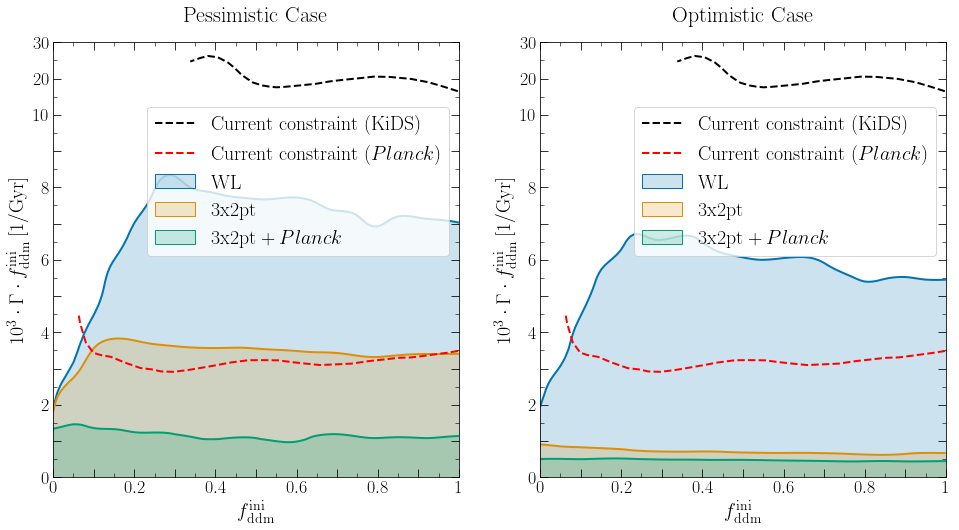

In [3]:
params_both = {
    'save_file_path':   './1b/probe comparison.pdf',
    'colours':          [
            (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 
            (0.8705882352941177,  0.5607843137254902,  0.0196078431372549), 
            (0.00784313725490196, 0.6196078431372549,  0.45098039215686275)
        ],
    'names':            ['$\mathrm{WL}$', '$\mathrm{3x2pt}$', r'$\mathrm{3x2pt} + Planck$'],
}

filename_pess = "./posteriors/1b/pess.npz"
loaded_file_pess = np.load(filename_pess)
file_pess = {
    'xs': np.array(loaded_file_pess['x']),
    'ys': np.array(loaded_file_pess['y']),
    'likelihoods': np.array(loaded_file_pess['lkl']),
    'levels': np.array(loaded_file_pess['lvl']),
    'extents': loaded_file_pess['exts']
}

filename_opt = "./posteriors/1b/opt.npz"
loaded_file_opt = np.load(filename_opt)
file_opt = {
    'xs': np.array(loaded_file_opt['x']),
    'ys': np.array(loaded_file_opt['y']),
    'likelihoods': np.array(loaded_file_opt['lkl']),
    'levels': np.array(loaded_file_opt['lvl']),
    'extents': loaded_file_opt['exts']
}

draw_2d_plot (params_global, params_both, file_pess, file_opt)

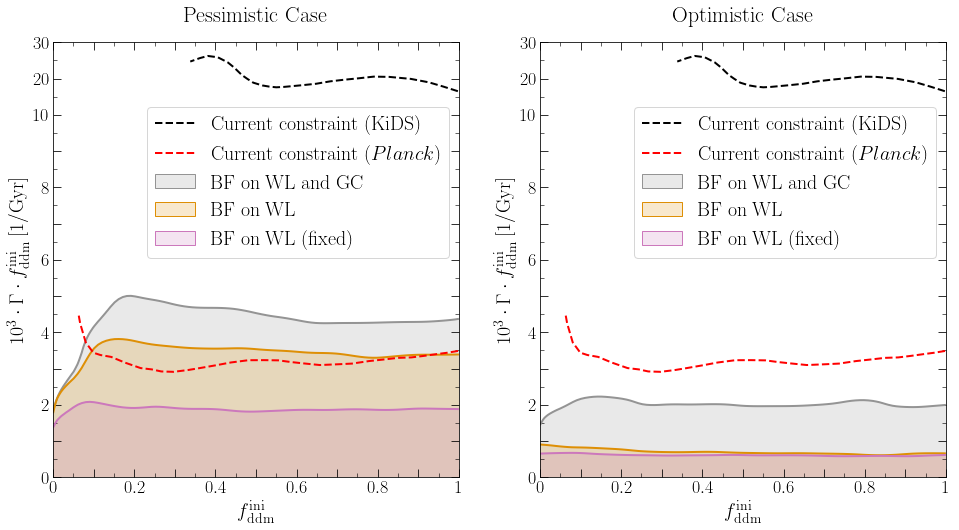

In [4]:
params_both = {
    'save_file_path':   './1b/BF comparison.pdf',
    'colours':          [
            (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
            (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
            (0.8, 0.47058823529411764, 0.7372549019607844),
        ],
    'names':            [r'$\mathrm{BF\;on\;WL\;and\;GC}$', r'$\mathrm{BF\;on\;WL}$', r'$\mathrm{BF\;on\;WL\;(fixed)}$'],
}

filename_pess = "./posteriors/1b/pess_BF_comparison.npz"
loaded_file_pess = np.load(filename_pess)
file_pess = {
    'xs': np.array(loaded_file_pess['x']),
    'ys': np.array(loaded_file_pess['y']),
    'likelihoods': np.array(loaded_file_pess['lkl']),
    'levels': np.array(loaded_file_pess['lvl']),
    'extents': loaded_file_pess['exts']
}

filename_opt = "./posteriors/1b/opt_BF_comparison.npz"
loaded_file_opt = np.load(filename_opt)
file_opt = {
    'xs': np.array(loaded_file_opt['x']),
    'ys': np.array(loaded_file_opt['y']),
    'likelihoods': np.array(loaded_file_opt['lkl']),
    'levels': np.array(loaded_file_opt['lvl']),
    'extents': loaded_file_opt['exts']
}

draw_2d_plot (params_global, params_both, file_pess, file_opt)